In [1]:
import pandas as pa
import seaborn as sns
import nltk
import regex as re
from collections import Counter

from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [2]:
df = pa.read_csv('titanic.csv')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [6]:
df.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [7]:
df.dtypes

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

## Check for null

In [8]:
df.isna().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

## Fill null

In [10]:
df['ticket'].fillna('unknown', inplace=True)
df['cabin'].fillna('unknown', inplace=True)
df.isna().sum()

C:\Users\rahul\AppData\Local\Temp\ipykernel_21284\2421085870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ticket'].fillna('unknown', inplace=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_21284\2421085870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [12]:
df['name'] = df['name'].str.upper()
df['cabin'] = df['cabin'].str.upper()
df['home.dest'] = df['home.dest'].str.upper()

In [14]:
df[df['boat'].str.contains('BUSH')]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [16]:
df['name'] = df['name'].str.len()
df.describe()

,pclass,survived,name,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,27.127578,0.498854,0.385027
std,0.837836,0.486055,9.503890,1.041658,0.865560
min,1.000000,0.000000,12.000000,0.000000,0.000000
25%,2.000000,0.000000,20.000000,0.000000,0.000000
50%,3.000000,0.000000,25.000000,0.000000,0.000000
75%,3.000000,1.000000,30.000000,1.000000,0.000000
max,3.000000,1.000000,82.000000,8.000000,9.000000


<Axes: >

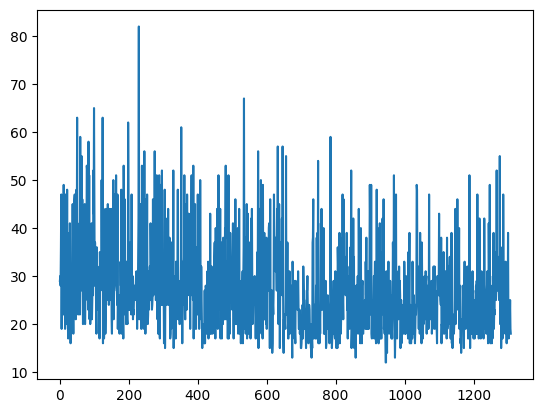

In [18]:
df['name'].plot()

<Axes: >

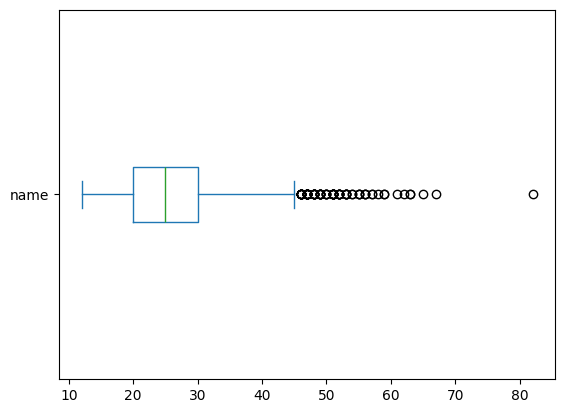

In [20]:
df['name'].plot(kind='box', vert=False)

## Histogram

<Axes: ylabel='Frequency'>

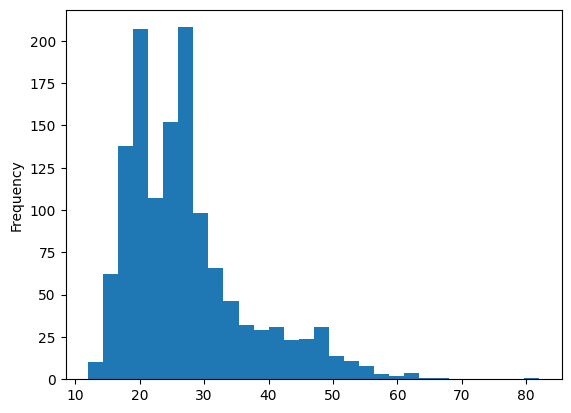

In [22]:
df['name'].plot(kind='hist', bins=30)

## Bar Plot

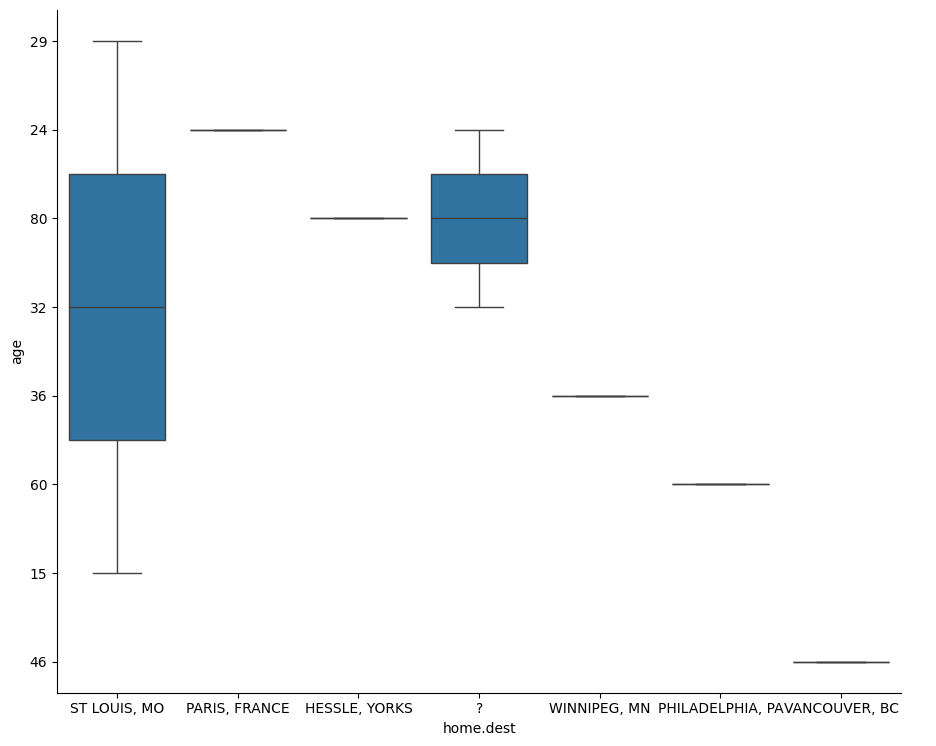

In [26]:
where = df['cabin'].isin(['B5', 'B35', 'A23', 'D15', 'C6'])
g = sns.catplot(data=df[where], x="home.dest", y="age", kind='box')
g.fig.set_size_inches(10, 8) ###

## Tokenization

In [27]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'o', 'other', 'when', "wouldn't", 'will', "haven't", 'yours', 'were', 'ours', 'the', 'then', 'those', "you'd", 'out', 'while', 'own', 'me', 'until', 'does', 'same', 'having', 'through', 'should', 'itself', 'm', 'why', 'now', 'what', "didn't", 'are', 'into', 'ain', 'hers', 'few', "she's", 'ma', 'with', 'her', "you've", 'herself', 'an', 'under', 'because', 'in', 'hasn', 'is', 'my', 'their', 'was', 'at', 'ourselves', 'against', 'after', 'have', 'before', 'am', 'y', 'aren', "shan't", "won't", 'some', 'his', 'about', 'to', "hasn't", 'further', "needn't", 'shouldn', 'more', 'he', 'all', 'or', 'isn', "isn't", 'did', 're', "you're", 'again', 'no', 'whom', 'can', 'don', 'couldn', "should've", 'this', 'each', 'its', "weren't", 'wouldn', 'mustn', "wasn't", 'has', 'too', 'down', 'needn', 'we', 'they', 'during', 'who', 'any', 'these', 'very', 'but', 'himself', 'between', 'once', 'd', 'mightn', 'it', 'shan', 'just', 'if', "doesn't", 'doing', 'didn', 'above', 'hadn', 'by', 'had', 'as', 'up', 'how', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [29]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)

In [30]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [31]:
pipeline = [str.lower, tokenize, remove_stop]

In [32]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [35]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

KeyError: 'text'

In [ ]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
7502,70,2015,YEM,Yemen,MR. ABDRABUH MANSOUR HADI MANSOUR,PRESIDENT,ON BEHALF OF THE PEOPLE AND THE GOVERNMENT OF ...,10568,"[behalf, people, government, yemen, would, lik...",894
7503,70,2015,YUG,Yugoslavia,MR. TOMISLAV NIKOLIĆ,PRESIDENT,\nSEVENTY YEARS HAVE PASSED SINCE THE ESTABLIS...,25430,"[seventy, years, passed, since, establishment,...",2118
7504,70,2015,ZAF,South Africa,JACOB ZUMA,PRESIDENT,I SHOULD LIKE TO CONGRATULATE THE PRESIDENT AN...,13662,"[like, congratulate, president, country, denma...",1160
7505,70,2015,ZMB,Zambia,MR. EDGAR CHAGWA LUNGU,PRESIDENT,I WOULD LIKE TO BEGIN BY THANKING THE SECRETAR...,14247,"[would, like, begin, thanking, secretary-gener...",1197
7506,70,2015,ZWE,Zimbabwe,ROBERT MUGABE,PRESIDENT,ALLOW ME AT THE OUTSET TO EXTEND TO MR. MOGENS...,11013,"[allow, outset, extend, mr, mogens, lykketoft,...",903


# Word frequencyAnalysis

In [ ]:
tokens = tokenize("She likes my cats and my cats like my sofa.")
testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [ ]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [ ]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [ ]:
freq_df = pa.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [ ]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [ ]:
freq_df.describe()

,freq
count,68302.000000
mean,162.686276
std,1544.080072
min,1.000000
25%,1.000000
50%,2.000000
75%,15.000000
max,124508.000000


## BarChart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

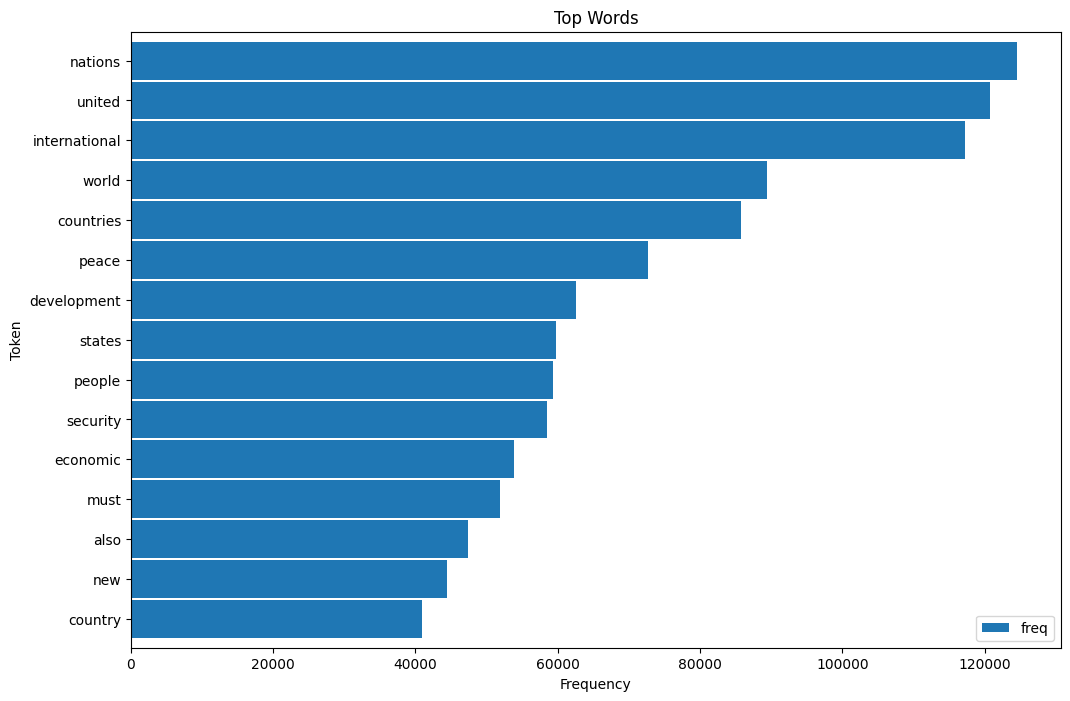

In [ ]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [ ]:
text = df.query("year==2015 and country=='USA'")['text'].values[0]

# WorldCloud

(-0.5, 399.5, 199.5, -0.5)

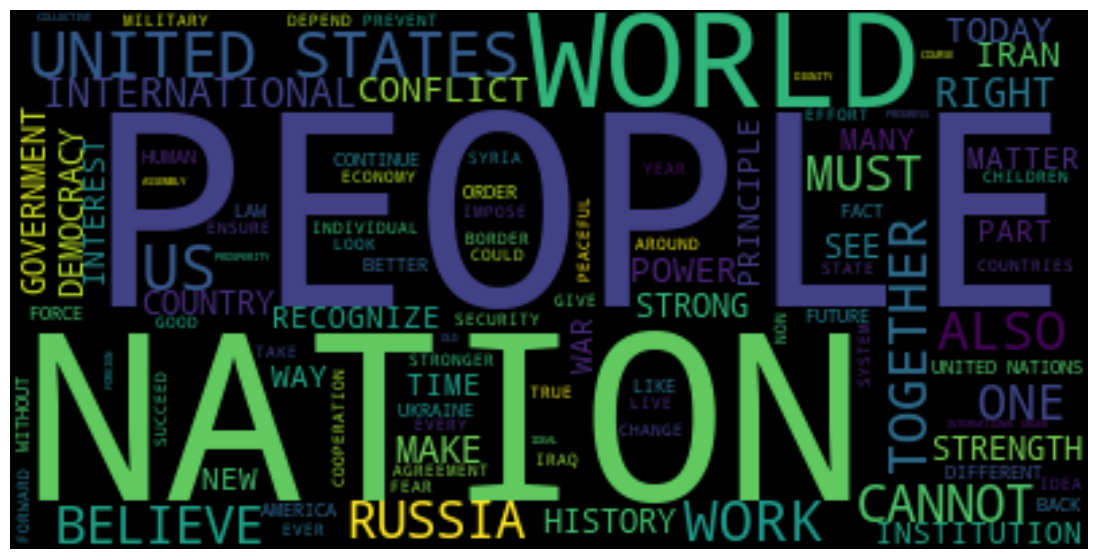

In [ ]:
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

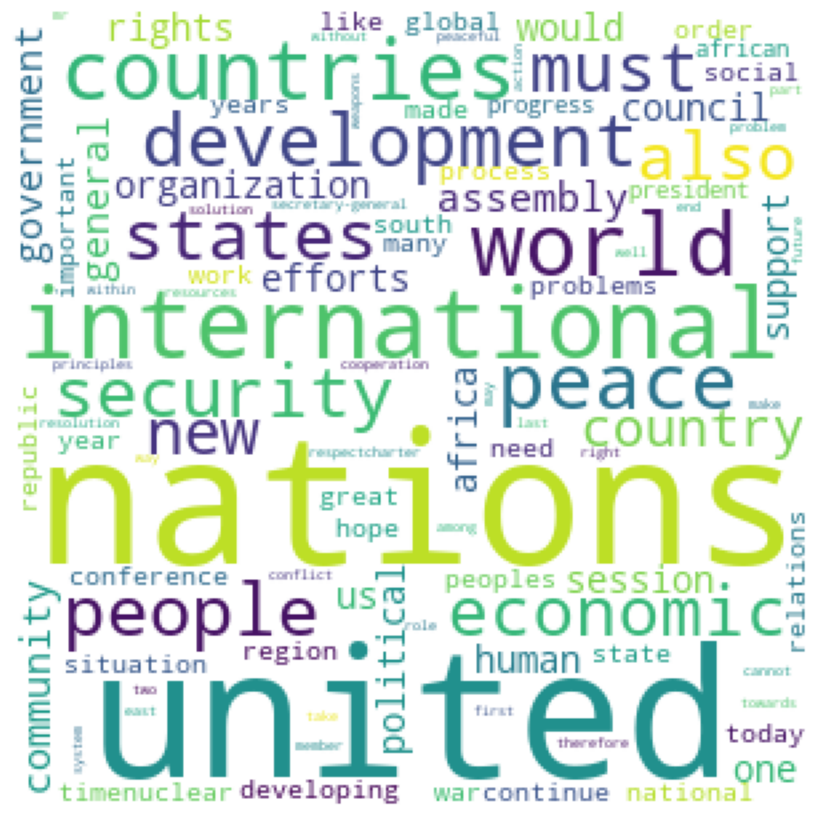

In [ ]:
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()